# Metrics and differential geometry

In [1]:
import generalrelativity as gr
import sympy
sympy.init_printing(use_latex=True)

In [2]:
from pprint import pprint

# Summary of last tutorial 

In the first tutorial we got to know about the `Tensor` object in `generalrelativity`. It can be created by specifying a basis of sympy symbols, a type $(p,q)$ and a dict of values. In this one we use metrics (that is, $(0,2)$-tensors that can be represented by a non-degenerate symmetric matrix) to raise and lower indices, and we also talk about index contraction.

# The (0,2)-Tensor to matrix equivalence. 

`generalrelativity` has two functions: one gets an $(0,2)$-tensor from a matrix and the other one gets a matrix from an $(0,2)$-tensor. Their syntaxes are:

```python
new_tensor = gr.get_tensor_from_matrix(matrix, basis)
new_matrix = gr.get_matrix_from_tensor(tensor)
```

For example

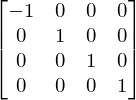

In [3]:
A = sympy.diag(-1, 1, 1, 1)
A

In [4]:
e0, e1, e2, e3 = sympy.symbols('e_0 e_1 e_2 e_3')
basis = [e0, e1, e2, e3]
T = gr.get_tensor_from_matrix(A, basis)
T

(1)e_2* \otimes e_2* + (1)e_1* \otimes e_1* + (-1)e_0* \otimes e_0* + (1)e_3* \otimes e_3*

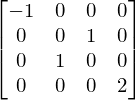

In [5]:
dict_of_values = {
    (0,0): -1,
    (1,2): 1,
    (2,1): 1,
    (3,3): 2
}
S = gr.Tensor(basis, (0, 2), dict_of_values)
S_matrix = gr.get_matrix_from_tensor(S)
S_matrix

# Raising and lowering indices using a metric, contracting indices

A very common operation in general relativity is **raising and lowering indices** (with respect to a metric) and **contracting indices**. the syntaxs of those functions are

```python
new_tensor = gr.raise_index(old_tensor, metric, index_to_be_raised)
new_tensor = gr.lower_index(old_tensor, metric, index_to_be_lowered)
new_tensor = gr.contract_indices(old_tensor, upper_index, lower_index)
```

These functions are mostly used internally for calculating the derived tensors from the Riemann tensor (i.e. Ricci tensor, scalar curvature, Einstein tensor)

# The Levi-Civita connection of a metric 

Once we have a metric $g$, `generalrelativiy` can calculate the Christoffel symbols of the Levi-Civita connection with the function `gr.get_christoffel_symbols_from_metric`, which returns a $(1,2)$ tensor.

As a practical example, consider the metric Gödel proposed:

$$ g = a^2(dx_0\otimes dx_0 - dx_1\otimes dx_1 + (e^{2x_1}/2)dx_2\otimes dx_2 - dx_3\otimes dx_3 + e^{x_1}dx_0\otimes dx_2 + e^{x_1}dx_2 \otimes dx_0) $$

Let's calculate the Christoffel symbols of the Levi-Civita connection associated with this metric:

In [6]:
a, x0, x1, x2, x3 = sympy.symbols('a x_0 x_1 x_2 x_3')
basis = [x0, x1, x2, x3]
e = sympy.exp(1)
values = {
    (0,0): a**2,
    (1,1): -a**2,
    (2,2): (1/2) * a**2 * e**(2*x1),
    (3,3): -a**2,
    (0,2): a**2*e**x1,
    (2,0): a**2*e**x1,
}
g = gr.Tensor(basis, (0, 2), values)
g

(-a**2)x_1* \otimes x_1* + (a**2)x_0* \otimes x_0* + (a**2*exp(x_1))x_0* \otimes x_2* + (0.5*a**2*exp(2*x_1))x_2* \otimes x_2* + (a**2*exp(x_1))x_2* \otimes x_0* + (-a**2)x_3* \otimes x_3*

Let's take a look at the matrix representation from $g$ and its respective inverse:

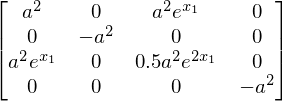

In [7]:
g_matrix = gr.get_matrix_from_tensor(g)
g_matrix

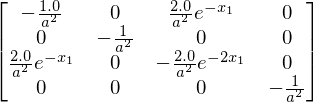

In [8]:
g_matrix.inv()

We can calculate the Christoffel symbols using the function mentioned above:

In [9]:
cs = gr.get_chrisoffel_symbols_from_metric(g)
pprint(cs.values)

{((0,), (0, 1)): 1.00000000000000,
 ((0,), (1, 0)): 1.00000000000000,
 ((0,), (1, 2)): 0.5*exp(x_1),
 ((0,), (2, 1)): 0.5*exp(x_1),
 ((1,), (0, 2)): 0.5*exp(x_1),
 ((1,), (2, 0)): 0.5*exp(x_1),
 ((1,), (2, 2)): 0.5*exp(2*x_1),
 ((2,), (0, 1)): -1.0*exp(-x_1),
 ((2,), (1, 0)): -1.0*exp(-x_1)}


All of which coincide with what's mentioned in the original article. Note that Christoffel symbols are created as `Tensor` objects, although they aren't tensors, theoretically speaking. This is because it's easier to deal with them as `Tensor` objects than it is to create a whole new class for holding them.

# Riemann tensor and friends 

`generalrelativity` has functions that allow you to calculate the Riemann, Ricci and Einstein tensors as well as the scalar curvature. Their syntax goes as follows:
```python
Riem = gr.get_Riemann_tensor(Christoffel_symbols)
Ric = gr.get_Ricci_tensor(Christoffel_symbols)
R = gr.get_scalar_curvature(Christoffel_symbols, metric)
G = gr.get_Einstein_tensor(Christoffel_symbols, metric)
```

One can also pass the `Riem` tensor in `Ric` (in order to avoid redundant calculations, for example)

If it seems redundant to put the `metric` as an argument in both `R` and `G` is becuase it theoretically is: the `Christoffel_symbols` should hold the information about the `metric` in them, but because they are implemented as tensors, they are not (yet) designed to hold that information, so one must necessarily provide it as an argument.


Using the same example as before (i.e. the Gödel metric), let's calculate each and every one of them:

## Riemann tensor 

In [10]:
Riem = gr.get_Riemann_tensor(cs)
pprint(Riem.values)

{((0,), (0, 0, 2)): 0.5*exp(x_1),
 ((0,), (0, 2, 0)): -0.5*exp(x_1),
 ((0,), (1, 0, 1)): -0.500000000000000,
 ((0,), (1, 1, 0)): 0.500000000000000,
 ((0,), (1, 1, 2)): 1.0*exp(x_1),
 ((0,), (1, 2, 1)): -1.0*exp(x_1),
 ((0,), (2, 0, 2)): 0.25*exp(2*x_1),
 ((0,), (2, 2, 0)): -0.25*exp(2*x_1),
 ((1,), (0, 0, 1)): -0.500000000000000,
 ((1,), (0, 1, 0)): 0.500000000000000,
 ((1,), (0, 1, 2)): 0.5*exp(x_1),
 ((1,), (0, 2, 1)): -0.5*exp(x_1),
 ((1,), (2, 0, 1)): -0.5*exp(x_1),
 ((1,), (2, 1, 0)): 0.5*exp(x_1),
 ((1,), (2, 1, 2)): 0.75*exp(2*x_1),
 ((1,), (2, 2, 1)): -0.75*exp(2*x_1),
 ((2,), (0, 0, 2)): -0.500000000000000,
 ((2,), (0, 2, 0)): 0.500000000000000,
 ((2,), (1, 1, 2)): -0.500000000000000,
 ((2,), (1, 2, 1)): 0.500000000000000,
 ((2,), (2, 0, 2)): -0.5*exp(x_1),
 ((2,), (2, 2, 0)): 0.5*exp(x_1)}


## Ricci tensor 

In [11]:
Ric = gr.get_Ricci_tensor(cs, Riem)
pprint(Ric.values)

{((), (0, 0)): 1.00000000000000,
 ((), (0, 2)): 1.0*exp(x_1),
 ((), (2, 0)): 1.0*exp(x_1),
 ((), (2, 2)): 1.0*exp(2*x_1)}


In [12]:
Ric = gr.get_Ricci_tensor(cs)
pprint(Ric.values)

{((), (0, 0)): 1.00000000000000,
 ((), (0, 2)): 1.0*exp(x_1),
 ((), (2, 0)): 1.0*exp(x_1),
 ((), (2, 2)): 1.0*exp(2*x_1)}


or, in LaTeX:

In [13]:
Ric

(1.0*exp(2*x_1))x_2* \otimes x_2* + (1.0*exp(x_1))x_2* \otimes x_0* + (1.00000000000000)x_0* \otimes x_0* + (1.0*exp(x_1))x_0* \otimes x_2*

## Scalar curvature

In [14]:
R = gr.get_scalar_curvature(cs, g)
pprint(R.values)
R

{((), ()): 1.0/a**2}


(1.0/a**2)

## Einstein tensor 

In [15]:
G = gr.get_Einstein_tensor(cs, g)
pprint(G.values)

{((), (0, 0)): 0.500000000000000,
 ((), (0, 2)): 0.5*exp(x_1),
 ((), (1, 1)): 0.500000000000000,
 ((), (2, 0)): 0.5*exp(x_1),
 ((), (2, 2)): 0.75*exp(2*x_1),
 ((), (3, 3)): 0.500000000000000}


# Hyperbolic metric in $\mathbb{R}^2$ 

Let's define another metric:

$$ g = (1/y^2)(dx\otimes dx + dy\otimes dy) $$

In [16]:
x, y = sympy.symbols('x y')

In [17]:
values = {
    (0,0): 1/y**2,
    (1,1): 1/y**2
}
basis = [x, y]
g = gr.Tensor(basis, (0, 2), values)

In [18]:
g

(y**(-2))x* \otimes x* + (y**(-2))y* \otimes y*

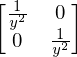

In [20]:
gr.get_matrix_from_tensor(g)

In [21]:
cs = gr.get_chrisoffel_symbols_from_metric(g)
gr.get_scalar_curvature(cs, g)

(-2.00000000000000)